In [44]:
import numpy as np
import pandas as pd

## Load and processing

In [45]:
df_news = pd.read_csv("lenta-ru-news.csv")
df_news["date"] = pd.to_datetime(df_news["date"])
df_news.head()

C:\Users\Laptop_user\AppData\Local\Temp\ipykernel_15668\2019238741.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_news = pd.read_csv("lenta-ru-news.csv")


,url,title,text,topic,tags,date
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая,1914-09-16
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая,1914-09-16
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая,1914-09-17
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая,1914-09-17
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая,1914-09-18


In [46]:
MIN_COUNT = len(df_news) * 0.005

### Select only if text exists:

In [47]:
df_news = df_news[df_news["text"].notna()]

### Null percentages and topic filtration:

In [48]:
percent_topic_missing = df_news["topic"].isnull().sum() * 100 / len(df_news)
percent_topic_missing

7.740864202154887

In [49]:
topics_to_use = df_news.topic.value_counts()[
    df_news.topic.value_counts() > MIN_COUNT
].index


df_news = df_news[df_news.topic.isin(topics_to_use)]


df_news.topic.value_counts(normalize=True)

topic
Россия               0.217841
Мир                  0.185497
Экономика            0.107980
Спорт                0.087457
Культура             0.073042
Бывший СССР          0.072507
Наука и техника      0.072146
Интернет и СМИ       0.060642
Из жизни             0.037481
Дом                  0.029510
Силовые структуры    0.026607
Ценности             0.010544
Бизнес               0.010046
Путешествия          0.008701
Name: proportion, dtype: float64

<Axes: >

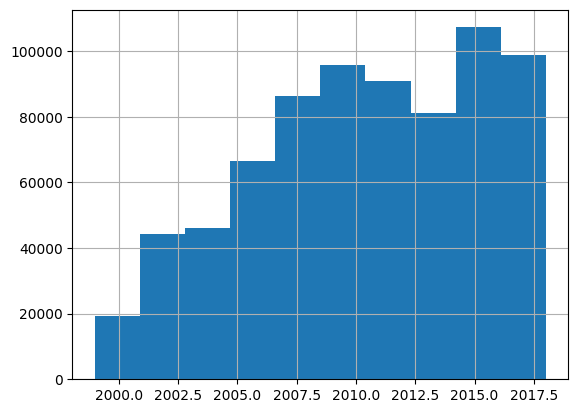

In [50]:
df_news.date.dt.year.hist()

In [51]:
percent_tags_missing = df_news["tags"].isnull().sum() * 100 / len(df_news)
percent_tags_missing

3.572805726482265

In [52]:
df_news["tags"].value_counts()

tags
Все                 452728
Политика             33220
Общество             27560
Украина              17934
Происшествия         15972
                     ...  
Социальная сфера        70
Вкусы                   54
Фотография              28
Страноведение           21
Выборы                  11
Name: count, Length: 78, dtype: int64

In [53]:
percent_missing = df_news["text"].isnull().sum() * 100 / len(df_news)
percent_missing

0.0

In [54]:
len(df_news)

736508

In [141]:
df_news[["title", "text", "topic", "date"]].to_csv("data/processed_news.csv")